<p style="font-weight: bold;text-align: center;font-size: 3em;color: #00338D">What can you do with pyESASky?</p>

This notebook shows examples of what a scientist may typically want to do within a Jupyter notebook using pyESASky, e.g:
* Download and inspect data from ESASky (images, spectra, catalogues, ...)
* Cross-match catalogues available through ESASky
* Upload your own data to ESASky, e.g.: 
  * Cross-matched tables
  * Vizier catalogues (astropy tables) 
  * User provided tables
  * Footprints
  * HiPS
* Interact with ESASky Functionalities:
  * Set the: FoV, HiPS
  * Go to a target or coordinates
  * Slide through a selection of HiPS
  * See the observations, catalogues and publications count in the current FoV
  * Load the data panel for observations, spectra and catalogues accessible in ESASky
  * JWST planning tool
  * Set the coordinates grid on and off

In [1]:
# Import the required python modules:
from pyesasky import ESASkyWidget
from pyesasky import Catalogue
from pyesasky import CatalogueDescriptor
from pyesasky import CooFrame
from pyesasky import ImgFormat
from pyesasky import FootprintSet
from pyesasky import FootprintSetDescriptor
from pyesasky import MetadataDescriptor
from pyesasky import MetadataType

import pandas as pd

In [2]:
# jupyter nbextension install --py pyesasky --sys-prefix
# jupyter nbextension enable --py pyesasky --sys-prefix

In [3]:
# Instantiate the pyESASky instance
esasky = ESASkyWidget()

All of the functions are now documented. Use the IPython ? magic to read about the function. Use tab to complete function names etc:

In [4]:
?ESASkyWidget.goToRADec

Signature: ESASkyWidget.goToRADec(self, ra, dec)
Docstring:
Moves the center of the view to the specified coordinate 
in current coordinate system

Arguments:
ra -- float or string in sexagesimal or decimal format
dec -- float or string in sexagesimal or decimal format
File:      c:\users\jason\anaconda3\envs\tf-gpu\lib\site-packages\pyesasky\pyesasky.py
Type:      function

In [5]:
# Load the pyESASky instance
esasky

ESASkyWidget(layout=Layout(align_self='stretch', height='400px'))

### Set custom height of the view

In [6]:
esasky.setViewHeight('850px')

### Go to a target name resolved against SIMBAD

In [7]:
esasky.goToTargetName('COSMOS Field')

### Go to RA and Dec (decimal degrees or sexagesimal format)

In [8]:
esasky.goToRADec('150.11917', '+02.20583') #COSMOS Field

### Set the Field of View in degrees

In [9]:
esasky.setFoV(0.5)

### Change the background HiPS to Herschel PACS colour

In [10]:
esasky.setHiPS('Herschel PACS RGB 70, 160 micron')
# type the following to see the available HiPS from ESASky:
# esasky.getAvailableHiPS()

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #00338D">Download and inspect data from ESASky</p>

### Information about the available data in the current field of view can be retrieved. For example the number of sources per catalogue:

In [11]:
catCount = esasky.getCataloguesCount()
catCount = pd.DataFrame.from_dict([catCount]).transpose()
catCount.columns = ['Count']
catCount

,Count
Hipparcos-2,0
Tycho-2,1
Gaia-DR3,679
PLATO asPIC1.1,7
Gaia-FPR,0
Herschel-SPSC-250,329
Planck-PCCS2-HFI,0
Planck-PCCS2-LFI,0
Planck-PSZ2,0
XMM-OM,1486


### Download sources from the XMM EPIC (3XMM-DR8) catalogue and Herschel PACS 100 micron Point Source Catalogue in the current field of view:

In [12]:
# Firstly, plot the XMM-Newton Serendipitous Source catalogue in ESASky:
esasky.plotCatalogues('XMM-EPIC')

Catalogs from missionId: XMM-EPIC displayed in the ESASky


In [13]:
# then parse the data with pandas
data=esasky.getResultPanelData()
xmmepic = pd.DataFrame.from_dict(data)
xmmepic

,bii,ccdm1,ccdm2,ccdpn,confused,date_end,date_obs,detid,dist_nn,duration,...,ep_8_flux_err,ep_2_flux,ep_2_flux_err,ep_3_flux,ep_3_flux_err,ep_4_flux,ep_4_flux_err,ep_5_flux,ep_5_flux_err,mjd_start
0,41.871898,1.0,1.0,1.0,False,2006-05-17T23:18:46.0,2006-05-17T17:46:47.0,103023518010046,38.55977,18038,...,5.150533e-15,1.275460e-15,3.981612e-16,1.582552e-15,5.351077e-16,4.068506e-15,1.335329e-15,1.986302e-15,4.816564e-15,53872.756829
1,41.872270,1.0,6.0,2.0,False,2004-12-13T06:11:29.0,2004-12-12T21:36:12.0,102033619010045,36.26597,29035,...,7.528119e-15,1.086722e-15,3.819100e-16,2.672575e-15,6.389533e-16,3.323130e-15,1.260350e-15,9.980941e-15,7.301651e-15,53351.916192
2,41.873052,8.0,1.0,1.0,False,2003-12-12T06:34:13.0,2003-12-11T22:32:19.0,102033618015062,33.49740,27037,...,3.183102e-15,7.515058e-16,2.637996e-16,1.876487e-15,4.208806e-16,1.926229e-15,8.514358e-16,5.367284e-17,2.905381e-15,52984.955139
3,41.871847,4.0,6.0,7.0,False,2004-12-13T06:11:29.0,2004-12-12T21:36:12.0,102033619010063,44.86391,29035,...,3.761473e-15,6.295035e-16,2.607458e-16,7.462641e-16,3.571965e-16,1.231581e-15,7.852875e-16,1.499905e-15,3.636769e-15,53351.916192
4,41.872428,2.0,7.0,2.0,False,2006-05-17T23:18:46.0,2006-05-17T17:46:47.0,103023518010067,45.80248,18038,...,8.618754e-15,1.800133e-15,5.483639e-16,1.099798e-15,5.924065e-16,1.487141e-15,1.282217e-15,0.000000e+00,8.415689e-15,53872.756829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,42.359250,1.0,6.0,2.0,False,2005-11-26T01:15:47.0,2005-11-25T19:43:56.0,103023508010104,118.57190,18037,...,5.105643e-15,1.138066e-16,2.124407e-16,1.516420e-15,5.718491e-16,2.289277e-15,1.238953e-15,1.804036e-15,4.896655e-15,53699.838113
706,42.391640,7.0,3.0,5.0,False,2005-11-23T10:37:52.0,2005-11-23T05:05:30.0,103023507010021,101.48450,18037,...,1.583272e-14,1.071770e-14,1.518947e-15,8.870534e-15,1.517365e-15,5.985735e-15,2.162507e-15,2.440473e-14,1.547548e-14,53697.228079
707,42.391596,1.0,6.0,2.0,False,2004-11-18T12:32:48.0,2004-11-17T21:48:58.0,102033608010011,98.27076,34793,...,8.805395e-15,7.042399e-15,7.115157e-16,7.901616e-15,8.359146e-16,1.106797e-14,1.750718e-15,2.581109e-14,8.526855e-15,53326.924965
708,42.391761,7.0,3.0,5.0,False,2003-12-06T11:10:14.0,2003-12-06T01:35:03.0,102033607010019,96.21605,32637,...,6.569900e-15,4.945401e-15,5.790224e-16,5.242568e-15,6.742369e-16,5.241033e-15,1.144223e-15,1.246440e-14,6.379668e-15,52979.081968


In [14]:
# Plot the Herschel-HPPSC-100 catalogue in ESASky:
esasky.plotCatalogues('Herschel-HPPSC-100')

Catalogs from missionId: Herschel-HPPSC-100 displayed in the ESASky


In [15]:
# then parse the data with pandas
data=esasky.getResultPanelData()
HPPSC100 = pd.DataFrame.from_dict(data)
HPPSC100

,band,decerr,fratio,raerr,snrnoise,strn,name,ra,dec,flux,...,fwhmxfit,fwhmyfit,snr,stn,elong_flag,edge_flag,blend_flag,warmat,ssomap_flag,obsid
0,green,0.000149,0.862042,0.000149,3.592271,11.290516,HPPSC100A_J095931.1+020400,149.879732,2.066793,6.194375,...,12.652350,5.015738,1.724362,3.117882,0.39643,True,0,False,False,1342186610
1,green,0.000093,1.246813,0.000093,3.377836,11.780167,HPPSC100A_J095929.8+020415,149.874521,2.070874,16.721182,...,7.449990,6.142634,4.950264,8.141095,0.82452,True,0,False,False,1342186610
2,green,0.000289,1.107412,0.000289,3.487201,10.504492,HPPSC100A_J095935.6+020401,149.898546,2.066961,5.855806,...,9.517804,6.215881,1.679228,3.149648,0.65308,True,0,False,False,1342186610
3,green,0.000303,1.652111,0.000303,2.371627,10.267478,HPPSC100A_J095940.4+020336,149.918525,2.060048,6.707739,...,7.412841,-99.900000,2.828328,3.711238,0.00000,True,0,False,False,1342186610
4,green,0.000058,1.215222,0.000058,3.565728,11.979542,HPPSC100A_J095940.3+020440,149.918196,2.077868,27.570760,...,7.257972,6.731940,7.732154,11.858815,0.92752,True,0,False,False,1342186610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,green,0.000179,1.132935,0.000179,4.441747,13.214699,HPPSC100A_J100116.0+022008,150.316863,2.335472,11.995592,...,12.998211,8.876977,2.700647,4.562505,0.68294,True,0,False,False,1342186610
566,green,0.000248,1.183553,0.000248,3.021677,9.746986,HPPSC100A_J100115.2+022110,150.313371,2.352880,6.373572,...,6.397358,-99.900000,2.109283,3.174036,0.00000,True,0,False,False,1342186610
567,green,0.000138,1.069333,0.000138,3.748000,11.271493,HPPSC100A_J100120.4+022022,150.335250,2.339374,9.948842,...,8.518755,-99.900000,2.654440,4.298913,0.00000,True,0,False,False,1342186610
568,green,0.000134,1.097525,0.000134,3.634068,11.121658,HPPSC100A_J100120.6+022111,150.336034,2.353172,11.827202,...,9.137727,5.732248,3.254535,6.323408,0.62732,True,0,False,False,1342186610


### Download and check the postcard of an observation from Chandra in the current FoV

In [16]:
# Firstly, plot the Chandra imaging observations in ESASky
esasky.plotObservations('Chandra')

Image observations from missionId: Chandra displayed in the ESASky


In [17]:
data=esasky.getResultPanelData()
chandra = pd.DataFrame.from_dict(data)
chandra

,access_url,access_estsize,access_format,calib_level,chandra_obs_photo_oid,dataproduct_subtype,dataproduct_type,data_rights,em_calib_status,em_max,...,t_stat_error,postcard_url,obs_id,instrument_name,target_name,s_ra,s_dec,t_min,t_exptime,stc_s
0,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,432,image/x-fits,2,4914407,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8001,ACIS,C-COSMOS,150.338138,2.289032,54192.154658,48674.862721,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
1,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,515,image/x-fits,2,4914412,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8006,ACIS,C-COSMOS,150.170323,2.220460,54101.492241,26681.765299,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
2,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,509,image/x-fits,2,4914413,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8007,ACIS,C-COSMOS,150.044920,2.266118,54088.929365,21753.017469,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
3,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,519,image/x-fits,2,4914414,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8008,ACIS,C-COSMOS,149.919773,2.311538,54102.194052,46431.672633,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
4,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,524,image/x-fits,2,4914418,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8012,ACIS,C-COSMOS,150.124713,2.095025,54104.229596,49499.527374,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
5,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,527,image/x-fits,2,4914419,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8013,ACIS,C-COSMOS,149.999441,2.140587,54104.822690,48115.634792,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
6,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,522,image/x-fits,2,4914420,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8014,ACIS,C-COSMOS,149.874166,2.186129,54105.395729,47858.684211,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
7,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,439,image/x-fits,2,4914521,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8123,ACIS,C-COSMOS,150.212714,2.334583,54197.569689,49123.589776,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
8,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,437,image/x-fits,2,4914522,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8124,ACIS,C-COSMOS,150.292376,2.163767,54198.154295,31689.459561,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...
9,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,506,image/x-fits,2,4914812,None,image,public,calibrated,6.000000e-09,...,0.0001,https://cdaftp.cfa.harvard.edu/cgi-bin/chaser_...,8497,ACIS,C-COSMOS,150.044928,2.266112,54094.076538,27797.102061,polygon j2000 UNION ICRS TOPOCENTER POLYGON 1...


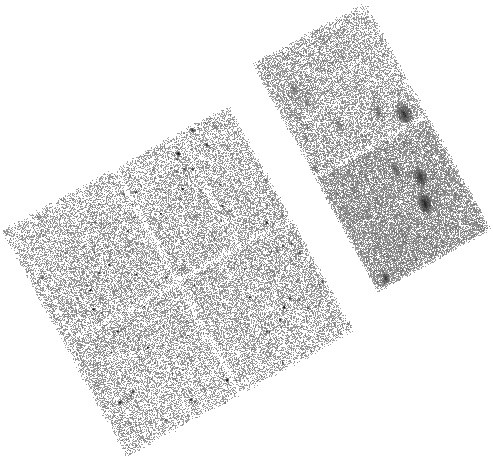

In [18]:
# plot one of the Chandra observation postcards:
from IPython.display import Image
Image(chandra.iloc[5]['postcard_url'])

### Download data from XMM-Newton in the current FoV

In [19]:
# Plot the XMM-Newton imaging observations in ESASky
esasky.plotObservations('XMM')

Image observations from missionId: XMM displayed in the ESASky


In [20]:
data=esasky.getResultPanelData()
xmm_newton = pd.DataFrame.from_dict(data)
xmm_newton

,position_angle,postcard_url,product_url,observation_id,observation_oid,ra_deg,dec_deg,target_name,instrument,start_time,end_time,duration,stc_s
0,109.31900,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0203360801,57698,150.36000,2.210000,COSMOS FIELD 8,EPIC,2004-11-17T21:48:58.0,2004-11-18T12:32:48.0,53030,POLYGON J2000 150.378966425527 1.962772734369...
1,111.49267,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0203361301,57703,150.10995,2.210000,COSMOS FIELD 13,EPIC,2003-12-10T11:23:18.0,2003-12-10T20:13:32.0,31814,POLYGON J2000 150.119182241097 1.961439563435...
2,110.58479,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0302350801,58370,150.34335,2.210000,Cosmos field B8,EPIC,2005-11-25T19:43:56.0,2005-11-26T01:15:47.0,19911,POLYGON J2000 150.355517498744 1.962272863506...
3,291.52957,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0672780101,62595,150.17985,2.110389,CID-42,EPIC,2011-06-03T05:13:50.0,2011-06-04T18:09:33.0,132943,POLYGON J2000 150.16060570992 1.8563273947007...
4,110.26381,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,http://nxsa.esac.esa.int/nxsa-sl/servlet/data-...,0302351301,58375,150.10995,2.226667,Cosmos field B13,EPIC,2005-11-23T17:25:30.0,2005-11-23T22:57:16.0,19906,POLYGON J2000 150.123699528738 1.978189503299...


### Display and get data from External Data Centres

In [21]:
# View the available predefined external TAP services in ESASky,
# e.g. European Southern Observatory (ESO), MAST (STScI), Canadian 
# Astronomical Data Centre (CADC)
esasky.getAvailableTapServices()

['ESO', 'ASTRON', 'HEASARC', 'CADC', 'MAST']

In [22]:
# View all the available external TAP missions:
esasky.getAllAvailableTapMissions()

{'ESO': {}, 'ASTRON': {}, 'HEASARC': {}, 'CADC': {}, 'MAST': {}}

In [24]:
# Return the available data in the current field of from ESO (from the ESO TAP):
esasky.getTapServiceCount('ESO')

{'ESO-spectrum-ZCOSMOS': 12865,
 'ESO-spectrum-FORS2-SPEC': 957,
 'ESO-spectrum-LEGA-C': 2390,
 'ESO-spectrum-XSHOOTER': 948,
 'ESO-spectrum-UVES': 26,
 'ESO-spectrum-GIRAFFE': 4708,
 'ESO-measurements-VIMOS': 188,
 'ESO-measurements-KIDS': 6,
 'ESO-measurements-UltraVISTA': 12,
 'ESO-measurements-HAWKI': 164,
 'ESO-measurements-ZCOSMOS': 1,
 'ESO-cube-ALMA': 3837,
 'ESO-cube-SUPER': 3,
 'ESO-cube-KMOS': 16492,
 'ESO-cube-MUSE': 198,
 'ESO-cube-MUSE-DEEP': 29,
 'ESO-image-UltraVISTA': 5,
 'ESO-image-VIMOS': 188,
 'ESO-image-HAWKI': 164,
 'ESO-image-KIDS': 4,
 'ESO-image-ALMA': 9790}

In [25]:
# Plot the footprints and metadata in pyESASky for ESO VLT images in the current FoV 
esasky.plotTapService('eso-image-eso-vlt-u')

TimeoutError: Request timed out

In [ ]:
data=esasky.getResultPanelData()
vlt = pd.DataFrame.from_dict(data)
vlt

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.0em;color: #00338D">Cross-match catalogues using astropy</p>

### Cross-match the two catalogues using astropy.coordinates

In [ ]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy import units as u

In [ ]:
ra1 = xmmepic['ra']
dec1 = xmmepic['dec']
ra2 = HPPSC100['ra']
dec2 = HPPSC100['dec']
c = SkyCoord(ra1, dec1, frame='icrs', unit='deg')
catalog = SkyCoord(ra2, dec2, frame='icrs', unit='deg')
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

In [ ]:
# Set a maximum separation as 5 arcseconds
max_sep = 5.0 * u.arcsec
idx, d2d, d3d = c.match_to_catalog_3d(catalog)
sep_constraint = d2d < max_sep
c_matches = c[sep_constraint]
catalog_matches = catalog[idx[sep_constraint]]
catalog_matches
#catalog_matches

In [ ]:
# Convert the SkyCoord column to an astropy table 
# and add a Name column (for pyESASky)
from astropy.table import Table
import numpy as np
XMMEPIC_HPPSC100 = Table()
XMMEPIC_HPPSC100['ra'] = catalog_matches.ra
XMMEPIC_HPPSC100['dec'] = catalog_matches.dec
XMMEPIC_HPPSC100['Name'] = np.linspace(1, catalog_matches.size, catalog_matches.size)
XMMEPIC_HPPSC100

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #00338D">Send your data to ESASky</p>

## Send the cross-matched table to ESASky

In [ ]:
# overlayCatalogueFromAstropyTable('<catName>', '<cooFrame>', <color>, <lineWidth>, <table>, '<raColname>', '<decColname>', '<mainIDColname>')
# where:
# - <catName> : name of the catalogue that will be used in pyESASky as label
# - <cooFRAME> : coordinate frame
# - <color> : HTML color. It could be a "Color name", "Hex color code" or "RGB color code"
# - <lineWidth> : width used to draw sources. From 1 to 10
# - <table> : name of the column containing a unique identifier for sources if any. None if not applicable
# - <raColname> : name of the RA column in degrees
# - <decColname> : name of the Dec column in degrees
# - <mainIDColname> : name of the column with the name of the source

esasky.overlayCatalogueFromAstropyTable('XMMEPIC_HPPSC100', 'J2000', '#ffff00', 10, XMMEPIC_HPPSC100, 'ra','dec','Name')

## Send a catalogue in VizieR to ESASky

In [ ]:
# Import the VizieR astroquery module
from astroquery.vizier import Vizier

In [ ]:
# Query the Véron-Cetty+ 2010 catalogue, VII/258/vv10, for the 
# Cosmos field with search radius 0.5 degrees
result = Vizier.query_region("Cosmos Field", 
                             radius=0.5*u.deg, catalog='VII/258/vv10')
print(result)

In [ ]:
Veron = result['VII/258/vv10']
Veron

In [ ]:
#transform the RA and Dec to degrees and add two new columns
c = SkyCoord(Veron['RAJ2000'], Veron['DEJ2000'], unit=(u.hourangle, u.deg))
Veron['RAJ2000'] = c.ra
Veron['DEJ2000'] = c.dec
Veron

In [ ]:
# Send the catalogue to ESASky
esasky.overlayCatalogueFromAstropyTable('Veron', 'J2000', '#33c9cc', 5, Veron, 'RAJ2000', 'DEJ2000','Name')

You can also upload your own tables from files or create your own tables and send them to ESASky.

## Send Footprints to ESASky

Go to another region in the sky, set the Fov and change the HiPS to Spitzer

In [ ]:
esasky.closeAllResultPanelTabs()
esasky.goToTargetName('[SPK2012] MWP1G300134-001035')
esasky.setFoV(2.3)
esasky.setHiPS("Spitzer cold SEIP IRAC-1-3-4 RGB bright")
#esasky.setHiPS("Spitzer", "http://cdn.skies.esac.esa.int/Spitzer/IRAC134_RGB_bright/")

In [ ]:
footprintDesc = FootprintSetDescriptor('test footprints', 'red', 5, 'id', 'id', 'stcs', 'ra', 'dec', [])

In [ ]:
esasky.overlayFootprintsFromCSV('./testfootprint.csv', ',', footprintDesc)

In [ ]:
esasky.closeResultPanelTab()

## Send your own HiPS to ESASky

This will start a tornado server opening up a port allowing web browser access to this path and all folders/files underneath

In [ ]:
esasky.goToRADec('266.41683', '-29.00781')
esasky.setFoV(90)
esasky.removeHiPS('User')
#Change the below directory to your own HiPS
esasky.addLocalHiPS('/Users/dbaines/Downloads/LFI_SkyMap_030_1024_R3.00_full_HiPS/')
esasky.openSkyPanel()

In [ ]:
esasky.setHiPSColorPalette('PLANCK')

In [ ]:
#Stop the tornado server:
esasky.httpserver.stop()

## Send HiPS from any URL to ESASky

There are many additional HiPS available from many HiPS nodes, all listed here in the Aladin HiPS list: https://aladin.u-strasbg.fr/hips/list 

Select which HiPS you'd like to load in the list, copy the HiPS URL from the HiPS ID column in the HiPS sky maps section and paste the URL into the esasky.addHiPS command. Examples:

In [ ]:
esasky.addHiPS("Skymapper", "https://alasky.u-strasbg.fr/Skymapper/skymapper_color/")
esasky.addHiPS("PanSTARRS DR1 color-i-r-g", "https://alasky.u-strasbg.fr/Pan-STARRS/DR1/color-i-r-g/")
esasky.addHiPS("DECaLS DR5 color", "https://alasky.u-strasbg.fr/DECaLS/DR5/color/")
esasky.addHiPS("ROSAT", "https://alasky.u-strasbg.fr/RASS/")

<br />
<p style="font-weight: bold;text-align: center;font-size: 2.5em;color: #00338D">Interacting with other ESASky Functionalities</p>

## Perform Cone, Box and Polygon Searches

There are a couple of ways to perform a cone search with pyESASky. 

#### Method 1) use the coneSearchCatalogues, Observations or Spectra commands:

In [ ]:
esasky.goToRADec('15 0 0', '-59')
esasky.setFoV(5)

In [ ]:
?esasky.coneSearchCatalogues

In [ ]:
esasky.coneSearchCatalogues('Herschel-HPPSC-160', '225.0', '-59', 1 )

In [ ]:
esasky.coneSearchObservations('Chandra', '225.0', '-59', 1 )

In [ ]:
esasky.coneSearchSpectra('ISO-IR', '225.0', '-59', 1 )

In [ ]:
esasky.closeAllResultPanelTabs()

#### Method 2) use the setConeSearchArea command:

Define the Ra, Dec and radius, then data returned will only fall within this region. 

In [ ]:
ra = 225.0
dec = -59.0
radius = 1.0 # in decimal degrees
esasky.setConeSearchArea(ra, dec, radius)

In [ ]:
esasky.plotCatalogues('Herschel-HPPSC-160')
esasky.plotObservations('Chandra')
esasky.plotSpectra('ISO-IR')

#### To perform a box or polygon search, use the setPolygonSearchArea(STCS) command. 

STCS strings are expected to follow the format of 'BOX|POLYGON ICRS RA(1) Dec(1) ... RA(n) Dec(n)'.

In [ ]:
esasky.setPolygonSearchArea('BOX ICRS 226.8297 -58.0490 223.2086 -58.0496 223.1085 -59.9203 226.9319 -59.9197')

In [ ]:
esasky.setPolygonSearchArea('POLYGON ICRS 226.8682 -58.2503 225.3984 -60.1154 222.9764 -57.9569')

In [ ]:
esasky.clearSearchArea()

The Search tool panel can also be opened and closed with the following:

In [ ]:
esasky.showSearchToolPanel()

In [ ]:
esasky.closeSearchToolPanel()

In [ ]:
esasky.clearSearchArea()

In [ ]:
esasky.closeAllResultPanelTabs()

## Sliding through different HiPS

In [ ]:
# Go to Seyfert 2 Galaxy Centaurus A
esasky.removeHiPS('User')
esasky.goToRADec(201.365063, -43.019113)
esasky.setFoV(0.2)

Add HiPS to the sky panel

In [ ]:
esasky.addHiPS("Chandra RGB")
esasky.addHiPS("XMM-Newton EPIC color")
esasky.addHiPS("DSS2 Color")
esasky.addHiPS("2MASS color JHK")
esasky.addHiPS("Spitzer cold SEIP IRAC2 faint")
esasky.addHiPS("Herschel PACS RGB 70, 160 micron")

Animations can be made programmatically using this slider function

In [ ]:
import time
for i in range(500):
    esasky.setHiPSSliderValue(i/100.0)
    time.sleep(0.02)

We can even create a slider in the python interface to control the HiPS

In [ ]:
import asyncio
nSkies = esasky.getNumberOfSkyRows()
def wait_for_change(widget, value):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.new)
        widget.unobserve(getvalue, value)
    widget.observe(getvalue, value)
    return future

from ipywidgets import FloatSlider
slider = FloatSlider(min=0.0, max=nSkies-1, step=0.01,  continuous_update=True)

async def f():
    while True:
        x = await wait_for_change(slider, 'value')
        esasky.setHiPSSliderValue(x)
asyncio.ensure_future(f())

slider

## Interacting with the JWST Planning Tool

### Open the JWST Planning Tool and add an instrument at specific coordinates

In [ ]:
esasky.closeSkyPanel() #first, close the sky panel
esasky.addJwstWithCoordinates("NIRSpec", "NRS_FULL_MSA", False, "201.365063", "-43.019113", "5")

### Add an instrument at the centre of the screen and include all instruments in the focal plane

In [ ]:
esasky.setFoV(0.5)
esasky.addJwst("NIRCam", "NRCALL_FULL", True)

In [ ]:
esasky.addJwstWithCoordinates?

In [ ]:
esasky.closeJwstPanel()

In [ ]:
esasky.openJwstPanel()

In [ ]:
esasky.clearJwstAll()
esasky.closeJwstPanel()

## Coordinates Grid

Switch on or off the coordinates grid:

In [ ]:
esasky.goToRADec(350.850, +58.815) #Cas A
esasky.setFoV(0.2)

In [ ]:
esasky.setHiPS('Chandra RGB')
esasky.showCoordinateGrid(True)

In [ ]:
esasky.showCoordinateGrid(False)

## Healpix MOCs

Display your own multi-order coverage (MOC) maps on the sky using IVOA string or JSON notation

In [ ]:
esasky.setHiPS('DSS2 color')
esasky.goToRADec(43.376, +05.8587) #Cas A
esasky.setFoV(150)
esasky.overlayMOC('6/2-15 23 554 7/22 50-75', 'myMoc', 'red', 0.2)

In [ ]:
esasky.overlayMOC('{"3":[1,2,3,4,5], "4":[26,27]}', 'myMoc2', '#FF1244', 1)

In [ ]:
esasky.removeMOC('myMoc')
esasky.removeMOC('myMoc2')

## Multi-Messenger Events

Return and visualise the multi-messenger events in ESASky.

#### Gravitational Wave (GW) Events:

Return the IDs of all available GW events in ESASky

In [ ]:
gwdata=esasky.getGWIds() 
GWs = pd.DataFrame.from_dict(gwdata)
GWs

Return the metadata of all available GW Events in ESASky

In [ ]:
pd.set_option('max_colwidth', 400)
gwdata=esasky.getGWData()
GWs = pd.DataFrame.from_dict(gwdata)
GWs

Open the GWs Multi-Messenger Events in ESASky and display a GW Event

In [ ]:
esasky.openGWPanel()
esasky.showGWEvent('S200316bj') 

#### Neutrino Events:

Return the metadata of all available Neutrino events in ESASky

In [ ]:
ndata=esasky.getNeutrinoEventData()
neutrinos = pd.DataFrame.from_dict(ndata)
neutrinos

Open the neutrino event panel

In [ ]:
esasky.openNeutrinoPanel()

Close the Multi-Messenger panel in ESASky

In [ ]:
esasky.closeAlertPanel() 

### Save and restore an ESASky session

Save the current ESASky session as a JSON file object with all settings, HiPS stack, datapanels etc.

In [ ]:
esasky.saveSession(fileName='ESASkySession.json')

Change ESASky settings and then restore the previous session

In [ ]:
esasky.showCoordinateGrid(False)
esasky.setHiPS('DSS2 color')
esasky.goToTargetName('M101')

In [ ]:
esasky.restoreSessionFromFile('ESASkySession.json')